In [1]:
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from logdir import get_run_logdir


2025-01-15 14:18:31.176495: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-15 14:18:31.193267: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-15 14:18:31.198067: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-15 14:18:31.209817: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
run_logdir = get_run_logdir()

In [3]:
(x_train,y_train),(x_test,y_test)= keras.datasets.mnist.load_data()
y_train,y_test = keras.utils.to_categorical(y_train,10),keras.utils.to_categorical(y_test,10)

In [4]:
model = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(20,activation='tanh'),
    keras.layers.Dense(10,activation='softmax')
])
model.compile(optimizer='SGD',loss='categorical_crossentropy',metrics=['accuracy'])

2025-01-15 14:18:33.833099: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2025-01-15 14:18:33.833125: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:135] retrieving CUDA diagnostic information for host: mickael-Aspire-A515-54G
2025-01-15 14:18:33.833131: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:142] hostname: mickael-Aspire-A515-54G
2025-01-15 14:18:33.833206: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:166] libcuda reported version is: 550.120.0
2025-01-15 14:18:33.833222: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:170] kernel reported version is: 550.120.0
2025-01-15 14:18:33.833226: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:249] kernel version seems to match DSO: 550.120.0


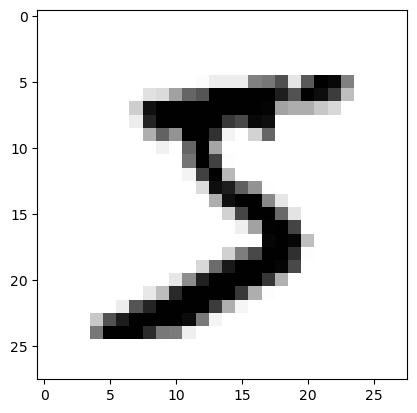

In [5]:
plt.imshow(x_train[0],cmap=plt.cm.gray_r,interpolation='nearest')

In [6]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(x_train,y_train,epochs=20,callbacks=[tensorboard_cb])

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.4508 - loss: 1.6479
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7076 - loss: 0.9430
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7230 - loss: 0.8516
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7521 - loss: 0.7667
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7469 - loss: 0.7669
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7740 - loss: 0.7067
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7822 - loss: 0.7012
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7519 - loss: 0.7182
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7852 - loss: 0.6669
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7508 - loss: 0.7655
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7849 - loss: 0.6694
Epoch 12/20
1875/1875 ━━━━━━━━

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (32, 784)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 20)               │        15,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 10)               │           210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,912 (62.16 KB)

 Trainable params: 15,910 (62.15 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [8]:
model.layers[1].weights

[<KerasVariable shape=(784, 20), dtype=float32, path=sequential/dense/kernel>,
 <KerasVariable shape=(20,), dtype=float32, path=sequential/dense/bias>]

In [24]:
import tensorflow as tf

# Instanciar a métrica
accuracy = tf.keras.metrics.Accuracy()

# Atualizar o estado da métrica com os valores reais e previstos
accuracy.update_state(y_test, np.round(model.predict(x_test),0))

# Obter o valor da acurácia
acc_value = accuracy.result().numpy()
print(f"Acurácia: {acc_value}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step
Acurácia: 0.9683302044868469


In [19]:
perceptron = keras.models.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(10,activation='softmax')
])

perceptron.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='SGD')

In [20]:
perceptron.fit(x_train,y_train,epochs=20,callbacks=[tensorboard_cb])

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8013 - loss: 455.7364
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8661 - loss: 263.9647
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8750 - loss: 246.7297
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8752 - loss: 240.5051
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8760 - loss: 240.8546
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8772 - loss: 249.9856
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8841 - loss: 227.6217
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8824 - loss: 229.6573
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8854 - loss: 224.0102
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8829 - loss: 229.2015
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8817 - loss: 232.2823
Epoch 12

In [23]:
accuracy2 = keras.metrics.Accuracy()

accuracy2.update_state(y_test,np.round(perceptron.predict(x_test),0))

acc2_value = accuracy2.result().numpy()
print(f"Acurácia: {acc2_value}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step
Acurácia: 0.9748402237892151
